<a href="https://colab.research.google.com/github/Thcataclismo/Data-sciense-/blob/main/Classifica%C3%A7%C3%A3o_de_imagens_com_TensorFlow_em_aprendizado_de_m%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que é Classificação de Imagens?

A classificação de imagens é o processo de categorizar e rotular grupos de pixels ou vetores em uma imagem de acordo com regras específicas. A lei de categorização pode ser projetada usando uma ou mais características espectrais ou texturais.

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt




O Fashion MNIST Dataset é uma versão avançada do tradicional conjunto de dados MNIST, que é muito usado como o “Hello, World” do aprendizado de máquina. O conjunto de dados MNIST contém imagens de números manuscritos (0, 1, 2 etc.) no mesmo formato das imagens de roupas que usarei para a tarefa de classificação de imagens com o TensorFlow. Agora vamos importar o conjunto de dados Fashion MNIST para começar a tarefa:




In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


No conjunto de dados, cada imagem é mapeada em um único rótulo. Como os nomes das classes não estão definidos no conjunto de dados, precisamos armazená-los aqui para que possamos usá-los posteriormente ao visualizar as imagens:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Pré-processar os dados

Para esta tarefa de Classificação de Imagens com TensorFlow, os dados devem ser pré-processados ​​antes do treinamento da rede neural. Se você inspecionar o primeiro quadro do conjunto de treinamento, verá que os valores de pixel estão entre 0 e 255:

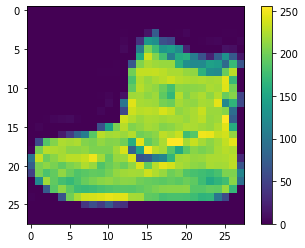

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Agora vou escalar esses valores para um intervalo de 0 a 1 antes de passá-los para o modelo de rede neural. Para isso, precisamos dividir os valores por 255. O conjunto de treinamento e o conjunto de teste devem ser pré-processados ​​da mesma forma:

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar se os dados estão no formato correto e verificar se estamos prontos para criar e treinar a rede neural para classificação de imagens com o TensorFlow, vamos exibir as primeiras 25 imagens do conjunto de treinamento e exibir o nome da classe abaixo de cada imagem :

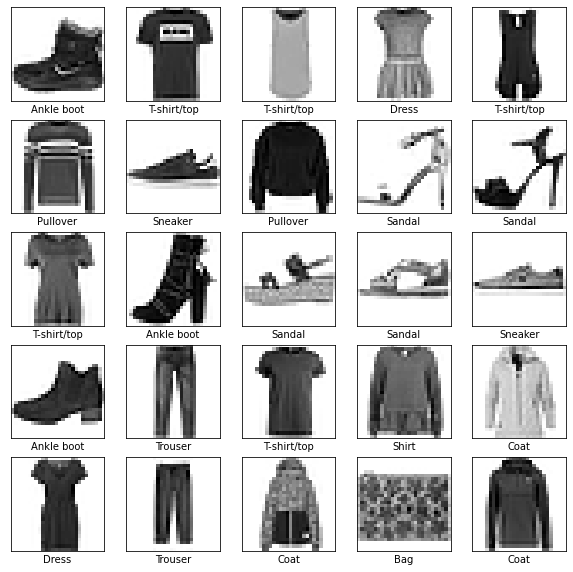

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Classificação de imagens com TensorFlow: modelo de construção

Agora, para construir a rede neural para a tarefa de classificação de imagens com o TensorFlow, primeiro precisamos configurar as camadas do modelo e depois seguir em frente com a compilação do modelo.

# Configurando Camadas

O bloco de construção básico das redes neurais são suas camadas. As camadas funcionam extraindo as representações dos dados alimentados nelas. A maior parte do aprendizado profundo, Modelos envolve fazer camadas simples juntas. Agora, vamos criar as camadas da nossa rede neural:

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compilando o modelo

Agora, vamos prosseguir com a compilação do nosso modelo:

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Classificação de imagens com TensorFlow: modelo de treinamento

Agora, vamos treinar a Rede Neural para a tarefa de Classificação de Imagens com o TensorFlow, e fazer previsões sobre ela:

In [9]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4991 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3391 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2922 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2550 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2457 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [10]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.7417028e-08, 1.0682051e-11, 6.5125211e-11, 2.1070220e-12,
       7.8414120e-10, 3.7329068e-04, 1.1449452e-07, 1.4511868e-02,
       1.4810188e-06, 9.8511308e-01], dtype=float32)

Uma previsão é uma matriz de 10 números. Eles representam a “confiança” do modelo de que a imagem combina com cada uma das 10 roupas diferentes. Vamos ver qual rótulo tem o maior valor de confiança:

In [11]:
np.argmax(predictions[0])

9

Assim, o modelo está mais convencido de que esta imagem é uma bota de tornozelo, ou class_names [9]. O exame do rótulo do teste mostra que esta classificação está correta:

In [ ]:
test_labels[0]

Agora, criarei uma função auxiliar para plotar nossas previsões:

In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verificar previsões

Vejamos o quadro 0 das previsões e a tabela de previsões. Os rótulos de previsão corretos são azuis e os rótulos de previsão incorretos são vermelhos:

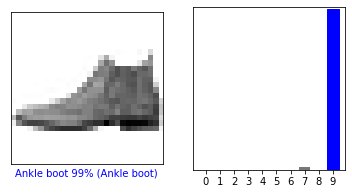

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

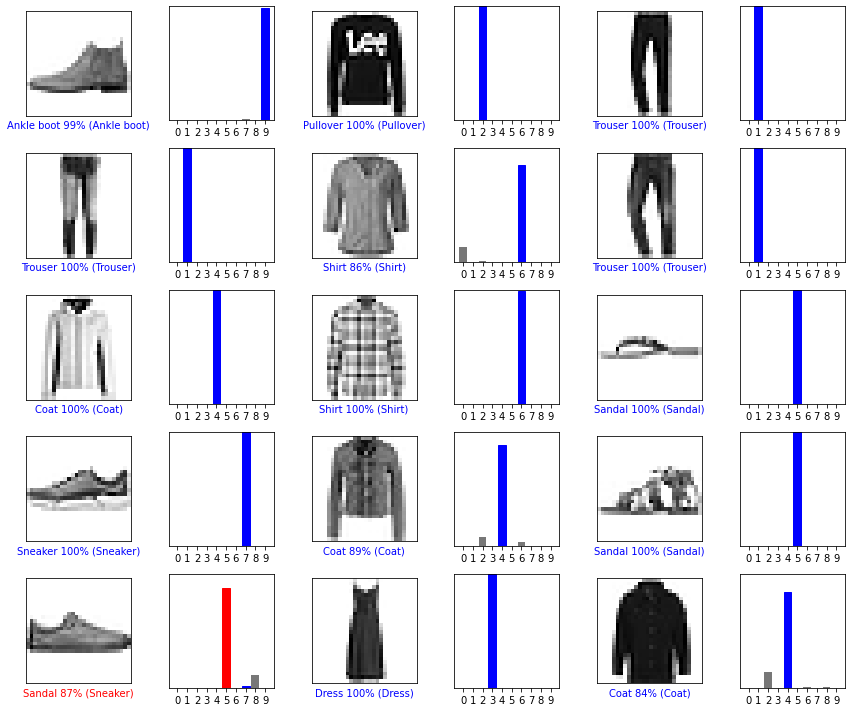

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()